In [1]:
import pandas as pd

In [2]:
!ls fungi

citations.txt  meta.xml        occurrence.trimmed.txt	     rights.txt
dataset        multimedia.txt  occurrence.trimmed.txt.fixed  verbatim.txt
metadata.xml   occurrence.csv  occurrence.txt


In [3]:
obs = pd.read_csv(
    'fungi/occurrence.txt',
    delimiter = '\t',
    low_memory=False,
)

In [4]:
obs.shape

(1426881, 257)

In [5]:
obs.head()

,gbifID,abstract,accessRights,accrualMethod,accrualPeriodicity,accrualPolicy,alternative,audience,available,bibliographicCitation,...,relativeOrganismQuantity,level0Gid,level0Name,level1Gid,level1Name,level2Gid,level2Name,level3Gid,level3Name,iucnRedListCategory
0,2862378302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,CAN,Canada,CAN.9_1,Ontario,CAN.9.35_1,Ottawa,CAN.9.35.1_1,Ottawa,NE
1,1572388850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,USA,United States,USA.20_1,Maine,USA.20.3_1,Cumberland,NaN,NaN,NE
2,1944424565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,MEX,México,MEX.19_1,Nuevo León,MEX.19.26_2,Higueras,NaN,NaN,NE
3,1838337501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,ZAF,South Africa,ZAF.9_1,Western Cape,ZAF.9.3_1,City of Cape Town,ZAF.9.3.1_1,City of Cape Town,NE
4,1841319995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,MEX,México,MEX.19_1,Nuevo León,MEX.19.24_2,Guadalupe,NaN,NaN,NE


In [6]:
obs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426881 entries, 0 to 1426880
Columns: 257 entries, gbifID to iucnRedListCategory
dtypes: bool(2), float64(186), int64(11), object(58)
memory usage: 2.7+ GB


In [7]:
# Lets look for columns that have too many NaN values or
# are otherwise useless to us...

In [8]:
na_counts = obs.isna().sum()
na_counts

gbifID                       0
abstract               1426881
accessRights           1426881
accrualMethod          1426881
accrualPeriodicity     1426881
                        ...   
level2Gid                14696
level2Name               14751
level3Gid               971834
level3Name             1050693
iucnRedListCategory      41249
Length: 257, dtype: int64

In [9]:
na_counts_rate = (100. * na_counts / len(obs)).round(0)
na_counts_rate

gbifID                   0.0
abstract               100.0
accessRights           100.0
accrualMethod          100.0
accrualPeriodicity     100.0
                       ...  
level2Gid                1.0
level2Name               1.0
level3Gid               68.0
level3Name              74.0
iucnRedListCategory      3.0
Length: 257, dtype: float64

In [10]:
na_counts_rate[ na_counts_rate > 25 ].shape

(184,)

In [11]:
na_counts_rate[ na_counts_rate > 50 ].shape

(184,)

In [12]:
na_counts_rate[ na_counts_rate > 75 ].shape

(182,)

In [13]:
na_counts_rate[ na_counts_rate > 90 ].shape

(181,)

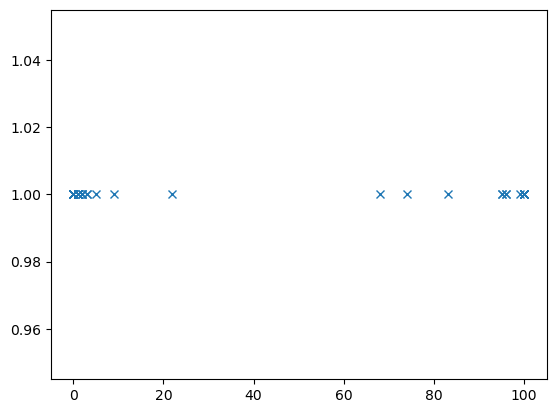

In [14]:
# Plotting each column's rate of NaN values to better identify
# the distribution of column NaN counts
import matplotlib.pyplot as pp
pp.plot(na_counts_rate, len(na_counts_rate) * [1], "x")

In [15]:
# List of columns we can effectively get rid of
drop_columns = na_counts_rate[ na_counts_rate > 50 ].keys().tolist()
print(len(drop_columns))
drop_columns

184


['abstract',
 'accessRights',
 'accrualMethod',
 'accrualPeriodicity',
 'accrualPolicy',
 'alternative',
 'audience',
 'available',
 'bibliographicCitation',
 'conformsTo',
 'contributor',
 'coverage',
 'created',
 'creator',
 'date',
 'dateAccepted',
 'dateCopyrighted',
 'dateSubmitted',
 'description',
 'educationLevel',
 'extent',
 'format',
 'hasFormat',
 'hasPart',
 'hasVersion',
 'instructionalMethod',
 'isFormatOf',
 'isPartOf',
 'isReferencedBy',
 'isReplacedBy',
 'isRequiredBy',
 'isVersionOf',
 'issued',
 'language',
 'mediator',
 'medium',
 'provenance',
 'relation',
 'replaces',
 'requires',
 'rights',
 'source',
 'spatial',
 'subject',
 'tableOfContents',
 'temporal',
 'title',
 'type',
 'valid',
 'institutionID',
 'collectionID',
 'datasetID',
 'ownerInstitutionCode',
 'informationWithheld',
 'dataGeneralizations',
 'dynamicProperties',
 'recordNumber',
 'recordedByID',
 'individualCount',
 'organismQuantity',
 'organismQuantityType',
 'sex',
 'lifeStage',
 'reproductiveC

In [16]:
obs = obs.drop( drop_columns, axis=1)
print(obs.shape)
obs.columns.tolist()

(1426881, 73)


['gbifID',
 'identifier',
 'license',
 'modified',
 'publisher',
 'references',
 'rightsHolder',
 'institutionCode',
 'collectionCode',
 'datasetName',
 'basisOfRecord',
 'occurrenceID',
 'catalogNumber',
 'recordedBy',
 'occurrenceStatus',
 'eventDate',
 'eventTime',
 'year',
 'month',
 'day',
 'verbatimEventDate',
 'countryCode',
 'stateProvince',
 'verbatimLocality',
 'decimalLatitude',
 'decimalLongitude',
 'coordinateUncertaintyInMeters',
 'identificationID',
 'identifiedBy',
 'dateIdentified',
 'taxonID',
 'acceptedNameUsageID',
 'scientificName',
 'kingdom',
 'phylum',
 'class',
 'order',
 'family',
 'genus',
 'genericName',
 'specificEpithet',
 'taxonRank',
 'taxonomicStatus',
 'datasetKey',
 'publishingCountry',
 'lastInterpreted',
 'issue',
 'mediaType',
 'hasCoordinate',
 'hasGeospatialIssues',
 'taxonKey',
 'acceptedTaxonKey',
 'kingdomKey',
 'phylumKey',
 'classKey',
 'orderKey',
 'familyKey',
 'genusKey',
 'speciesKey',
 'species',
 'acceptedScientificName',
 'verbatimSci

In [17]:
# Now lets look at the distribution of values within each of these
# columns to see if there are any with only one value that we
# can get rid of

In [18]:
one_val_cols = []
for col in obs.columns:
    vc = obs[col].value_counts()
    if ( len(vc) == 1 ):
        one_val_cols.append(col)
one_val_cols

['publisher',
 'institutionCode',
 'collectionCode',
 'datasetName',
 'basisOfRecord',
 'occurrenceStatus',
 'kingdom',
 'datasetKey',
 'kingdomKey',
 'protocol',
 'lastCrawled']

In [19]:
# The above list makes sense because our download/export
# query was based on the kingdom "Fungi" and the
# "iNaturalist Research-grade Observations" dataset
obs = obs.drop( one_val_cols, axis=1 )
obs.shape

(1426881, 62)

In [23]:
obs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426881 entries, 0 to 1426880
Data columns (total 62 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   gbifID                         1426881 non-null  int64  
 1   identifier                     1426881 non-null  int64  
 2   license                        1426881 non-null  object 
 3   modified                       1426881 non-null  object 
 4   references                     1426881 non-null  object 
 5   rightsHolder                   1426881 non-null  object 
 6   occurrenceID                   1426878 non-null  object 
 7   catalogNumber                  1426881 non-null  int64  
 8   recordedBy                     1426881 non-null  object 
 9   eventDate                      1426881 non-null  object 
 10  eventTime                      1361145 non-null  object 
 11  year                           1426881 non-null  int64  
 12  month         

<AxesSubplot: >

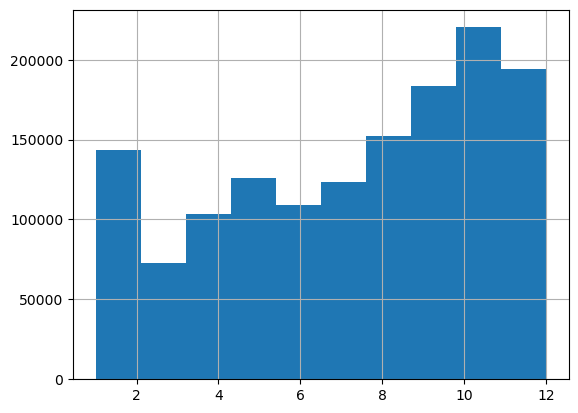

In [25]:
obs['month'].hist()

<AxesSubplot: >

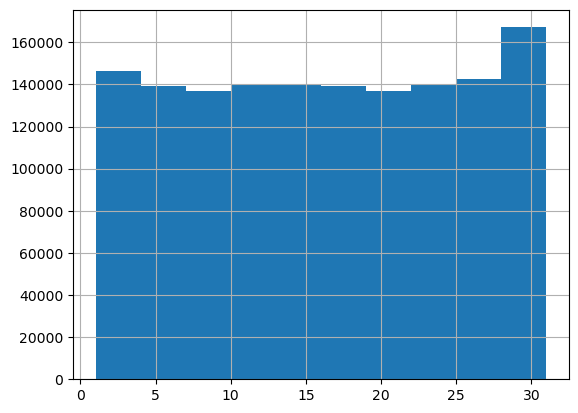

In [28]:
obs['day'].hist()

<AxesSubplot: xlabel='month', ylabel='Count'>

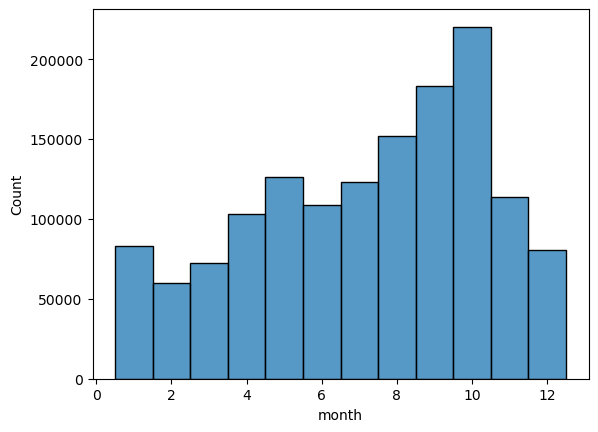

In [42]:
# histogram with seaborn
import seaborn as sns

# add a month_name column
obs['month_name'] = pd.to_datetime(
    '2010-' + obs['month'].astype(int).astype(str) + '-1',
    format = '%Y-%m'
).dt.month_name()

sns.histplot(
    data=obs,
    x='month',
    bins=12,
    discrete=True,
)

It looks like mushrooms are mostly found in the summer/fall months, especially October.

I'd like to try making a grid graph similar to [this example from iNaturalist's API documentation](https://pyinaturalist.readthedocs.io/en/stable/examples/Data%20Visualizations%20-%20Seaborn.html):
![example](https://pyinaturalist.readthedocs.io/en/stable/_images/examples_Data_Visualizations_-_Seaborn_14_1.png)

In [58]:
# Look at relevant time columns
cols = [
    'eventDate',
    'eventTime',
    'year',
    'month',
    'day',
    'verbatimEventDate',
]
for col in cols:
    print(obs[col].head())
    print()

0    2015-08-27T00:00:00
1    2015-07-02T00:00:00
2    2017-12-02T09:20:47
3    2014-06-16T00:00:00
4    2018-04-30T13:55:00
Name: eventDate, dtype: object

0               NaN
1               NaN
2    09:20:47+06:00
3               NaN
4    13:55:00-05:00
Name: eventTime, dtype: object

0    2015
1    2015
2    2017
3    2014
4    2018
Name: year, dtype: int64

0     8
1     7
2    12
3     6
4     4
Name: month, dtype: int64

0    27
1     2
2     2
3    16
4    30
Name: day, dtype: int64

0                            2015-08-27
1                            2015-07-02
2    2017-12-02 9:20:47 a. m. GMT-06:00
3                            2014-06-16
4                2018/04/30 1:55 PM CDT
Name: verbatimEventDate, dtype: object



In [80]:
# lets just pull what we need from eventDate to get
# fractional (float) values for time_of_month and time_of_day

times_df = pd.DataFrame()

times_df['time'] = pd.to_datetime(obs['eventDate'])

times_df['time_of_month_in_minutes'] = (
    ( times_df['time'].dt.day * 24 * 60 ) +
    ( times_df['time'].dt.hour * 60 ) +
    ( times_df['time'].dt.minute )
)
times_df['time_of_day_in_minutes'] =  (
    ( times_df['time'].dt.hour * 60 ) +
    ( times_df['time'].dt.minute )
)

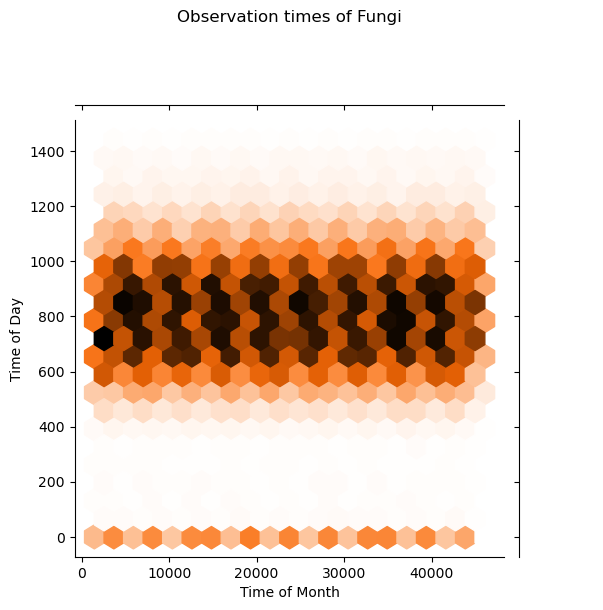

In [85]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np

PLOT_COLOR = '#fa7b23'

def get_colormap(color):
    """Make a colormap (gradient) based on the given color; copied from seaborn.axisgrid"""
    color_rgb = mpl.colors.colorConverter.to_rgb(color)
    colors = [sns.set_hls_values(color_rgb, l=l) for l in np.linspace(1, 0, 12)]
    return sns.blend_palette(colors, as_cmap=True)

grid = sns.JointGrid(
    data=times_df,
    x='time_of_month_in_minutes',
    y='time_of_day_in_minutes',
    # dropna=True
)

grid.ax_marg_x.set_title(
    'Observation times of Fungi'
)

# Format X axis labels & ticks
xaxis = grid.ax_joint.get_xaxis()
xaxis.label.set_text('Time of Month')
# xaxis.set_major_locator(dates.DayLocator(interval=30))
# xaxis.set_major_formatter(dates.DateFormatter('%b %d'))
# xaxis.set_minor_locator(dates.DayLocator(interval=7))
# xaxis.set_minor_formatter(dates.DateFormatter('%d'))

# Format Y axis labels & ticks
yaxis = grid.ax_joint.get_yaxis()
yaxis.label.set_text('Time of Day')
# yaxis.set_major_locator(dates.HourLocator(interval=2))
# yaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
# yaxis.set_minor_locator(dates.HourLocator())
# yaxis.set_minor_formatter(dates.DateFormatter('%H:%M'))

# Generate a joint plot with marginal plots
# Using the hexbin plotting function, because hexagons are the bestagons.
# Also because it looks just a little like butterfly scales.
grid.plot_joint(
    plt.hexbin,
    gridsize=20,
    cmap=get_colormap(PLOT_COLOR),
)


This yeilds some questions:
* Why do we have this weird pattern aroud 12:00?
  * rounding/binning? It tends to go away when bins are decreased and becomes more apparent when bins are increased.
* Why are there a bunch of observations at 0:00?
  * It is likely a default time for when the actual time is unknown.

In [86]:
times_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426881 entries, 0 to 1426880
Data columns (total 3 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   time                      1426881 non-null  datetime64[ns]
 1   time_of_month_in_minutes  1426881 non-null  int64         
 2   time_of_day_in_minutes    1426881 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 32.7 MB


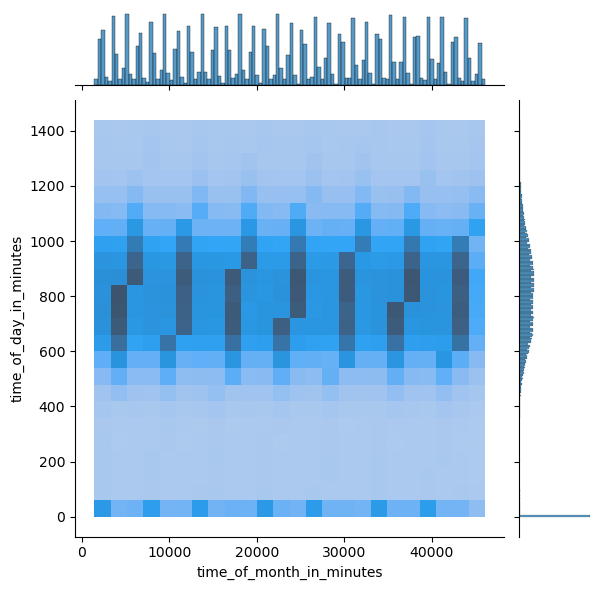

In [88]:
sns.jointplot(
    data=times_df,
    x='time_of_month_in_minutes',
    y='time_of_day_in_minutes',
    bins=24,
    kind='hist',
)

It's not perfect and doesn't tell us anything very interesting. There are still some issues that could be ironed out but it works...

In [95]:
# save the cleaned observations df
obs.to_hdf( 'clean_data.h5', 'obs' )

/tmp/ipykernel_5839/3423314498.py:2: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->Index(['license', 'modified', 'references', 'rightsHolder', 'occurrenceID',
       'recordedBy', 'eventDate', 'eventTime', 'verbatimEventDate',
       'countryCode', 'stateProvince', 'verbatimLocality', 'identifiedBy',
       'dateIdentified', 'scientificName', 'phylum', 'class', 'order',
       'family', 'genus', 'genericName', 'specificEpithet', 'taxonRank',
       'taxonomicStatus', 'publishingCountry', 'lastInterpreted', 'issue',
       'mediaType', 'species', 'acceptedScientificName',
       'verbatimScientificName', 'lastParsed', 'repatriated', 'level0Gid',
       'level0Name', 'level1Gid', 'level1Name', 'level2Gid', 'level2Name',
       'iucnRedListCategory', 'month_name'],
      dtype='object')]

  obs.to_hdf( 'clean_data.h5', 'obs' )


In [96]:
!ls -lah 'clean_data.h5'

-rw-r--r-- 1 charlescoult charlescoult 761M Nov 27 11:51 clean_data.h5
